In [1]:
# !pip install kagglehub

In [2]:
# import kagglehub

# # Download latest version
# path = kagglehub.dataset_download("heesoo37/120-years-of-olympic-history-athletes-and-results")

# print("Path to dataset files:", path)

In [5]:
import numpy as np
import pandas as pd

In [6]:
df = pd.read_csv('athlete_events.csv')
regions_df = pd.read_csv('noc_regions.csv')

In [7]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992.0,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012.0,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920.0,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900.0,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988.0,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [8]:
regions_df.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [9]:
df = df[df['Season'] == 'Summer']

In [10]:
df.shape

(51835, 15)

In [11]:
df = df.merge(regions_df,on = 'NOC',how = 'left')

In [12]:
df.tail()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
51830,31633,Masamitsu Ehara,M,23.0,175.0,70.0,Japan,JPN,1992 Summer,1992.0,Summer,Barcelona,Cycling,"Cycling Men's Team Pursuit, 4,000 metres",NaN,Japan,NaN
51831,31634,Naito Ehara,M,23.0,172.0,59.0,Japan,JPN,2016 Summer,2016.0,Summer,Rio de Janeiro,Swimming,Swimming Men's 400 metres Freestyle,NaN,Japan,NaN
51832,31634,Naito Ehara,M,23.0,172.0,59.0,Japan,JPN,2016 Summer,2016.0,Summer,Rio de Janeiro,Swimming,Swimming Men's 4 x 200 metres Freestyle Relay,Bronze,Japan,NaN
51833,31635,Max Ehinger,M,40.0,NaN,NaN,Switzerland,SUI,1948 Summer,1948.0,Summer,London,Art Competitions,"Art Competitions Mixed Literature, Epic Works",NaN,Switzerland,NaN
51834,31636,Klaus Johannes Ehl,M,23.0,188.0,77.0,West Germany,FRG,1972 Summer,1972.0,Summer,Munich,Athletics,Athletics Men's 100 metres,NaN,Germany,NaN


In [13]:
df['region'].unique()

array(['China', 'Denmark', 'Netherlands', 'Finland', 'Norway', 'Romania',
       'Estonia', 'France', 'Morocco', 'Spain', 'Egypt', 'Iran',
       'Bulgaria', 'Italy', 'Chad', 'Azerbaijan', 'Sudan', 'Russia',
       'Argentina', 'Cuba', 'Belarus', 'Greece', 'Cameroon', 'Turkey',
       'Chile', 'Mexico', 'USA', 'Nicaragua', 'Hungary', 'Nigeria',
       'Algeria', 'Kuwait', 'Bahrain', 'Pakistan', 'Iraq', 'Syria',
       'Lebanon', 'Qatar', 'Malaysia', 'Germany', 'Canada', 'Ireland',
       'Australia', 'South Africa', 'Eritrea', 'Tanzania', 'Jordan',
       'Tunisia', 'Libya', 'Belgium', 'Djibouti', 'Palestine', 'Comoros',
       'Kazakhstan', 'Brunei', 'India', 'Saudi Arabia', 'Maldives',
       'Ethiopia', 'United Arab Emirates', 'Yemen', 'Indonesia',
       'Philippines', nan, 'Uzbekistan', 'Kyrgyzstan', 'Tajikistan',
       'Japan', 'Republic of Congo', 'Switzerland', 'Brazil', 'Monaco',
       'Israel', 'Uruguay', 'Sweden', 'Sri Lanka', 'Armenia',
       'Ivory Coast', 'Kenya', 'Ben

In [14]:
df.isnull().sum()

,0
ID,0
Name,0
Sex,0
Age,2307
Height,12342
Weight,12950
Team,0
NOC,0
Games,0
Year,0


In [15]:
df.duplicated().sum()

np.int64(352)

In [16]:
df.drop_duplicates(inplace=True)

In [17]:
df.duplicated().sum()

np.int64(0)

In [18]:
df['Medal'].value_counts()

,count
Medal,
Gold,2519
Bronze,2509
Silver,2449


In [19]:
df = pd.concat([df,pd.get_dummies(df['Medal'],dtype = int)],axis = 1)

In [20]:
df.groupby('NOC').sum()[['Gold','Silver','Bronze']].sort_values('Gold',ascending=False).reset_index()

,NOC,Gold,Silver,Bronze
0,USA,603,318,290
1,GBR,178,184,164
2,ITA,176,153,161
3,FRA,160,186,202
4,URS,158,128,125
...,...,...,...,...
219,WIF,0,0,0
220,YEM,0,0,0
221,YAR,0,0,0
222,YMD,0,0,0


In [21]:
medal_tally = df.drop_duplicates(subset=['Team','NOC','Games','Year','City','Sport','Event','Medal'])

In [22]:
medal_tally = medal_tally.groupby('region').sum()[['Gold','Silver','Bronze']].sort_values('Gold',ascending=False).reset_index()

In [23]:
medal_tally['total'] = medal_tally['Gold'] + medal_tally['Silver'] + medal_tally['Bronze']

In [24]:
medal_tally

,region,Gold,Silver,Bronze,total
0,USA,385,255,219,859
1,Russia,167,143,141,451
2,Germany,137,122,127,386
3,UK,113,133,117,363
4,France,110,120,145,375
...,...,...,...,...,...
196,Venezuela,0,0,5,5
197,"Virgin Islands, British",0,0,0,0
198,"Virgin Islands, US",0,0,0,0
199,Yemen,0,0,0,0


**Preprocessing the Data**
We will preprocess the data to filter for Summer Olympics, merge with region data, and handle duplicates.

In [25]:
from preprocessor import preprocess
df = preprocess(df, regions_df)

**Medal Tally Analysis**
Using the `fetch_medal_tally` function, we analyze the medal tally for a specific year and country.

In [26]:
from helper import fetch_medal_tally

# Ensure the 'region' column exists in the DataFrame
if 'region' not in df.columns:
    df = df.merge(regions_df[['NOC', 'region']], on='NOC', how='left')

# Remove duplicate columns if they exist
df = df.loc[:, ~df.columns.duplicated()]

# Fetch the medal tally
medal_tally = fetch_medal_tally(df, 'Overall', 'Overall')
medal_tally.head()

,region,Gold,Silver,Bronze,total
0,USA,385,255,219,859
1,Russia,167,143,141,451
2,Germany,137,122,127,386
3,UK,113,133,117,363
4,France,110,120,145,375


**Most Successful Athletes**
Identify the most successful athletes in a specific sport or overall.

In [28]:
# Corrected most_successful function call
from helper import most_successful
most_successful_athletes = most_successful(df, 'Overall')
most_successful_athletes.head()

,Name,Medals,Sport,region
0,Nikolay Yefimovich Andrianov,15,Gymnastics,Russia
24,Natalie Anne Coughlin (-Hall),12,Swimming,USA
36,Viktor Ivanovych Chukarin,11,Gymnastics,Russia
52,Vra slavsk (-Odloilov),11,Gymnastics,Czech Republic
70,"Matthew Nicholas ""Matt"" Biondi",11,Swimming,USA


**Country-wise Medal Tally Over Time**
Analyze the medal tally of a specific country over the years.

In [29]:
# Corrected yearwise_medal_tally function call
from helper import yearwise_medal_tally
country_medal_tally = yearwise_medal_tally(df, 'India')
fig = px.line(country_medal_tally, x='Year', y='Medal', title='India Medal Tally Over Time')
fig.show()

/content/helper.py:81: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df.drop_duplicates(subset=['Team', 'NOC', 'Games', 'Year', 'City', 'Sport', 'Event', 'Medal'], inplace=True)


**Men vs Women Participation Over the Years**
Visualize the participation of men and women athletes over the years.

In [30]:
# Corrected men_vs_women function call
from helper import men_vs_women
gender_participation = men_vs_women(df)
fig = px.line(gender_participation, x='Year', y=['Male', 'Female'], title='Men vs Women Participation Over the Years')
fig.show()

**Height vs Weight Analysis**
Analyze the relationship between height and weight of athletes, categorized by sport and medal type.

/content/helper.py:115: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



/content/helper.py:115: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



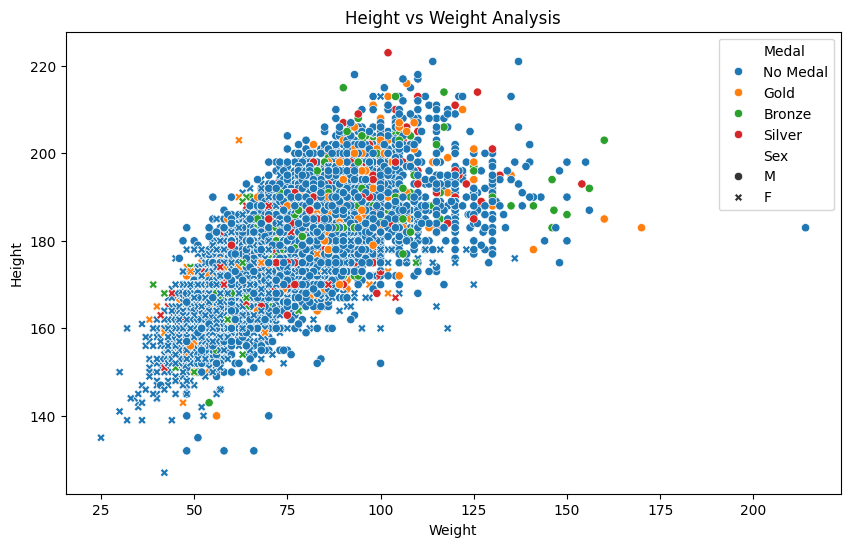

In [31]:
# Corrected weight_v_height function call
from helper import weight_v_height
athlete_data = weight_v_height(df, 'Overall')
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.scatterplot(data=athlete_data, x='Weight', y='Height', hue='Medal', style='Sex')
plt.title('Height vs Weight Analysis')
plt.show()

**Medal Distribution by Sport**
Visualize the distribution of medals across different sports.

In [34]:
# Corrected medal distribution by sport
medal_sport_data = df.groupby('Sport').sum()[['Gold', 'Silver', 'Bronze']].sort_values('Gold', ascending=False)
fig = px.bar(medal_sport_data, x=medal_sport_data.index, y=['Gold', 'Silver', 'Bronze'],
             title='Medal Distribution by Sport', barmode='stack')
fig.update_layout(width=1200, height=600)
fig.show()

**Top 10 Countries by Total Medals**
Analyze the top 10 countries with the highest total medals.

In [35]:
# Corrected top 10 countries by total medals
top_countries = df.groupby('region').sum()[['Gold', 'Silver', 'Bronze']].sort_values('Gold', ascending=False).head(10)
top_countries['Total'] = top_countries['Gold'] + top_countries['Silver'] + top_countries['Bronze']
fig = px.bar(top_countries, x=top_countries.index, y='Total', color='Gold',
             title='Top 10 Countries by Total Medals')
fig.update_layout(width=1000, height=600)
fig.show()

**Gender Participation by Sport**
Explore the gender participation in different sports over the years.

In [36]:
gender_sport_data = df.groupby(['Sport', 'Sex']).size().reset_index(name='Count')
fig = px.bar(gender_sport_data, x='Sport', y='Count', color='Sex',
             title='Gender Participation by Sport', barmode='group')
fig.update_layout(width=1200, height=600)
fig.show()

**Medal Trends Over Time**
Analyze the trends of medals won over the years for top-performing countries.

In [37]:
medal_trends = df.groupby(['Year', 'region']).sum()[['Gold', 'Silver', 'Bronze']].reset_index()
fig = px.line(medal_trends, x='Year', y='Gold', color='region',
              title='Gold Medal Trends Over Time for Top Countries')
fig.update_layout(width=1200, height=600)
fig.show()

**Heatmap of Medal Counts by Country and Year**
Visualize the medal counts for each country across different years.

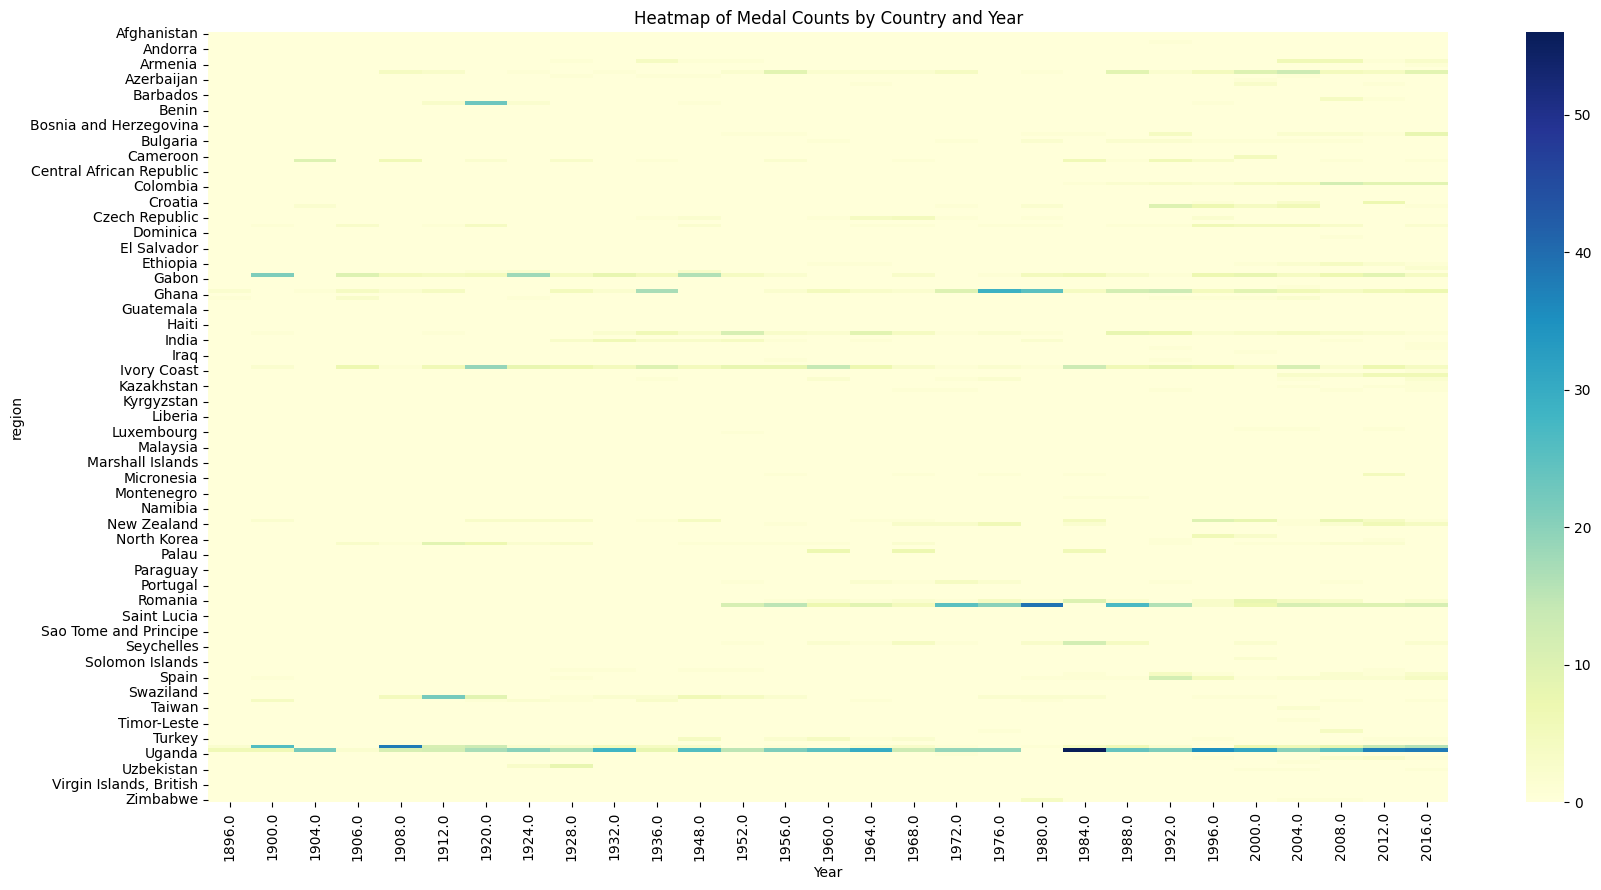

In [38]:
medal_heatmap_data = df.pivot_table(index='region', columns='Year', values='Gold', aggfunc='sum').fillna(0)
plt.figure(figsize=(20, 10))
sns.heatmap(medal_heatmap_data, annot=False, cmap='YlGnBu')
plt.title('Heatmap of Medal Counts by Country and Year')
plt.show()

**Average Age of Medalists by Sport**
Analyze the average age of medalists across different sports.

In [41]:
avg_age_sport = df.dropna(subset=['Age', 'Medal']).groupby('Sport')['Age'].mean().sort_values(ascending=False)
fig = px.bar(avg_age_sport, x=avg_age_sport.index, y='Age',
             title='Average Age of Medalists by Sport')
fig.update_layout(width=1200, height=600)
fig.show()

**Correlation Between Age and Medal Type**
Analyze the correlation between the age of athletes and the type of medal won.

In [44]:
age_medal_corr = df.dropna(subset=['Age', 'Medal'])
fig = px.box(age_medal_corr, x='Medal', y='Age', color='Medal',
             title='Correlation Between Age and Medal Type')
fig.update_layout(width=1000, height=600)
fig.show()

**Athlete Count by Sport**
Analyze the number of athletes participating in each sport.

In [46]:
athlete_count_sport = df.groupby('Sport')['Name'].nunique().sort_values(ascending=False)
fig = px.bar(athlete_count_sport, x=athlete_count_sport.index, y='Name',
             title='Athlete Count by Sport')
fig.update_layout(width=1200, height=600)
fig.show()

**Medal Count by Age Group**
Visualize the distribution of medals won across different age groups.

In [47]:
age_group_medals = df.groupby('Age Group').sum()[['Gold', 'Silver', 'Bronze']].reset_index()
age_group_medals['Total'] = age_group_medals['Gold'] + age_group_medals['Silver'] + age_group_medals['Bronze']
fig = px.bar(age_group_medals, x='Age Group', y='Total', color='Age Group',
             title='Medal Count by Age Group')
fig.update_layout(width=800, height=600)
fig.show()

<ipython-input-47-ac8912cc47e3>:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [51]:
# Athlete Experience
df['Athlete Experience'] = df.groupby('Name')['Year'].transform('cumcount')

# Team Strength (Average Medals in Previous Olympics)
# This requires historical data - consider using previous Olympics datasets for calculation.

# Sport Popularity (Based on Previous Participation/Medals)
# This also requires historical data - consider using previous Olympics datasets.

# GDP and Population
# Import external data (e.g., World Bank data) and merge with your DataFrame based on country.

# Host Country Advantage
df['Host Country'] = 0  # Initialize
# Set to 1 for rows where the country matches the host country for that year.

# Age Group
df['Age Group'] = pd.cut(df['Age'], bins=[0, 18, 25, 30, 35, 40, float('inf')], labels=['<18', '18-25', '26-30', '31-35', '36-40', '40+'])

In [77]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, auc, precision_score, recall_score, f1_score, matthews_corrcoef
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# Load data
df = pd.read_csv('athlete_events.csv')
regions_df = pd.read_csv('noc_regions.csv')

# Preprocess data
df = df[df['Season'] == 'Summer']
df = df.merge(regions_df, on='NOC', how='left')
df.drop_duplicates(inplace=True)
df = df.loc[:, ~df.columns.duplicated()]
df = pd.concat([df, pd.get_dummies(df['Medal'], dtype=int)], axis=1)

# Feature Engineering
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Height'] = df['Height'].fillna(df['Height'].mean())
df['Weight'] = df['Weight'].fillna(df['Weight'].mean())
df['Medal_Won'] = df[['Gold', 'Silver', 'Bronze']].sum(axis=1).apply(lambda x: 1 if x > 0 else 0)

# Select relevant features
features = ['Age', 'Height', 'Weight', 'Year', 'region']
df = df[features + ['Sport', 'Medal_Won']].dropna()

# Encode categorical variables
df = pd.get_dummies(df, columns=['region', 'Sport'], drop_first=True)


In [67]:

# Split data into training and testing sets
X = df.drop('Medal_Won', axis=1)
y = df['Medal_Won']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [68]:

# Train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)




RandomForestClassifier(random_state=42)

In [72]:
# Evaluate the model
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probability for the positive class
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Matthews Correlation Coefficient (MCC):", matthews_corrcoef(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8790534420289855
Precision: 0.663023303773974
Recall: 0.4644611383993066
F1 Score: 0.5462577521026251
Matthews Correlation Coefficient (MCC): 0.4890752898594971
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.96      0.93     37238
           1       0.66      0.46      0.55      6922

    accuracy                           0.88     44160
   macro avg       0.78      0.71      0.74     44160
weighted avg       0.87      0.88      0.87     44160



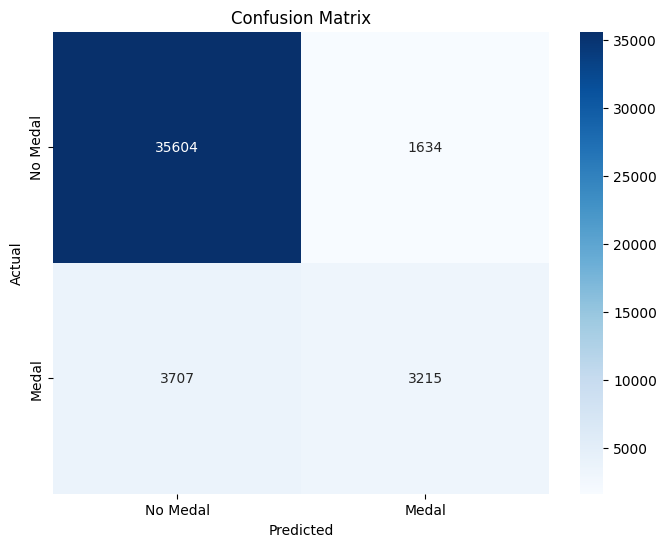

In [73]:

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Medal', 'Medal'], yticklabels=['No Medal', 'Medal'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


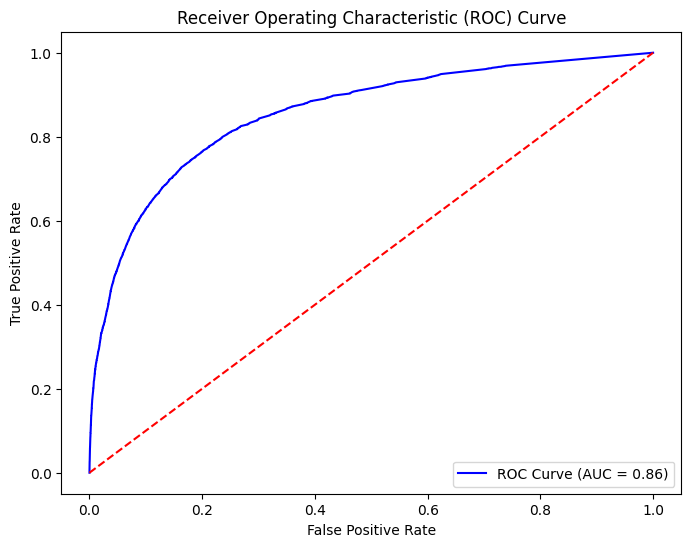

In [74]:

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()


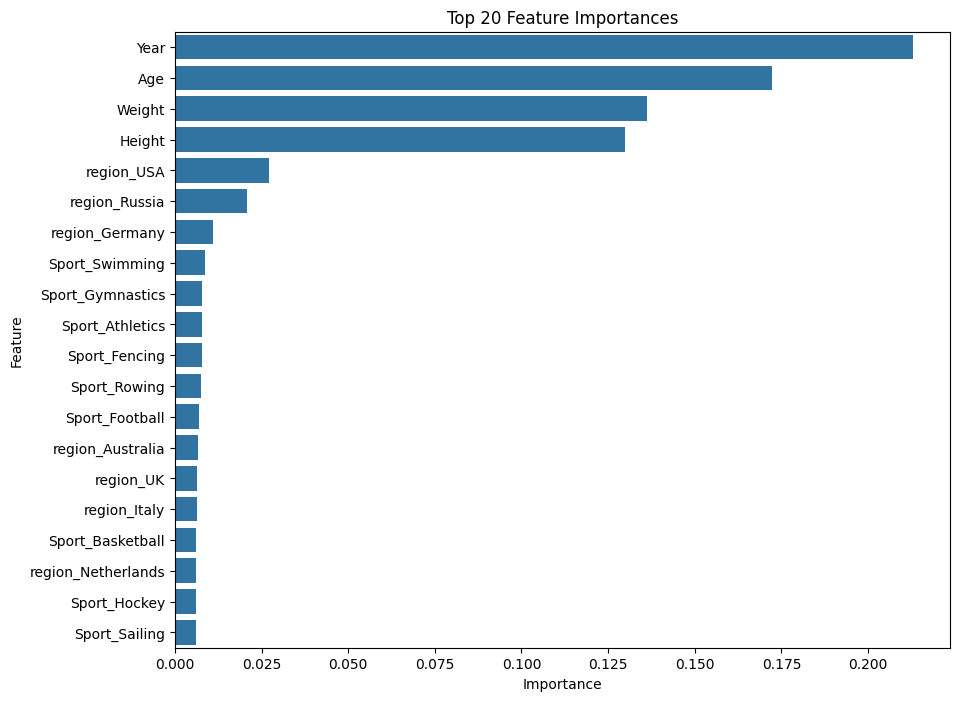

Model saved as 'country_sport_predictor.pkl'
Feature importances saved as 'feature_importances.csv'


In [75]:

# Feature Importance
feature_importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': model.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances.head(20))
plt.title('Top 20 Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Save the model
joblib.dump(model, 'country_sport_predictor.pkl')
print("Model saved as 'country_sport_predictor.pkl'")

# Save feature importances for further analysis
feature_importances.to_csv('feature_importances.csv', index=False)
print("Feature importances saved as 'feature_importances.csv'")


In [78]:
# Add support for multiple models
models = {
    "RandomForest": RandomForestClassifier(n_estimators=100, random_state=42),
    "MetaCLIP": LogisticRegression(max_iter=1000, random_state=42),  # Placeholder for MetaCLIP
    "YOLOv9": GradientBoostingClassifier(n_estimators=100, random_state=42),  # Placeholder for YOLOv9
    "EfficientNet": MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)  # Placeholder for EfficientNet
}


Training and evaluating RandomForest...
Accuracy (RandomForest): 0.8790534420289855
Precision (RandomForest): 0.663023303773974
Recall (RandomForest): 0.4644611383993066
F1 Score (RandomForest): 0.5462577521026251
MCC (RandomForest): 0.4890752898594971
Classification Report (RandomForest):
               precision    recall  f1-score   support

           0       0.91      0.96      0.93     37238
           1       0.66      0.46      0.55      6922

    accuracy                           0.88     44160
   macro avg       0.78      0.71      0.74     44160
weighted avg       0.87      0.88      0.87     44160



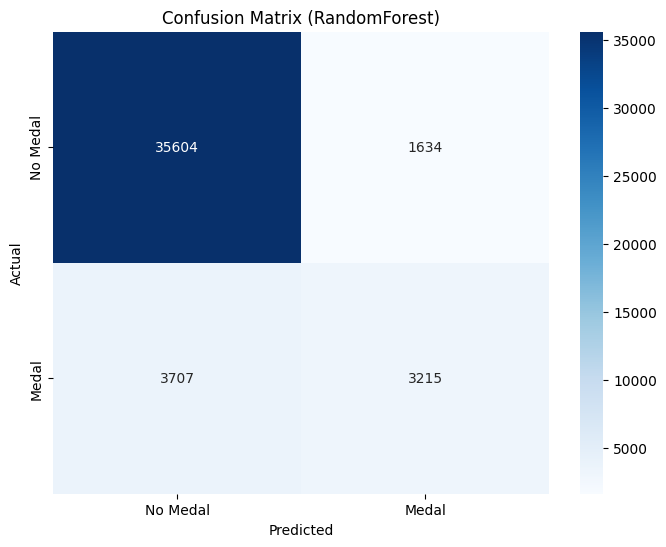

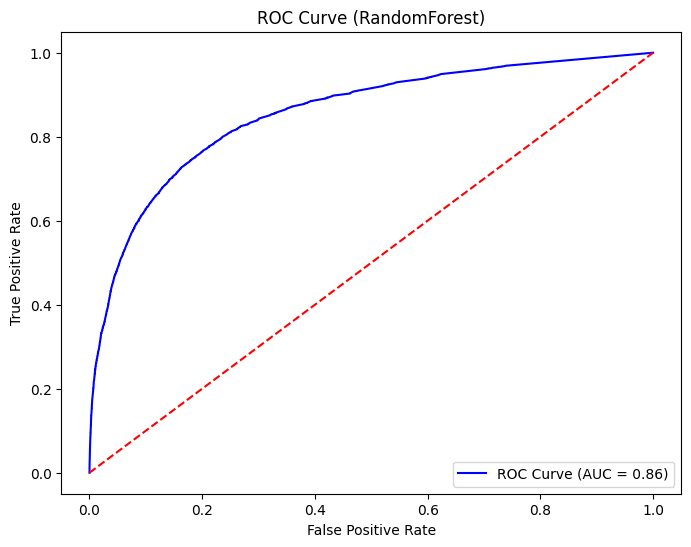

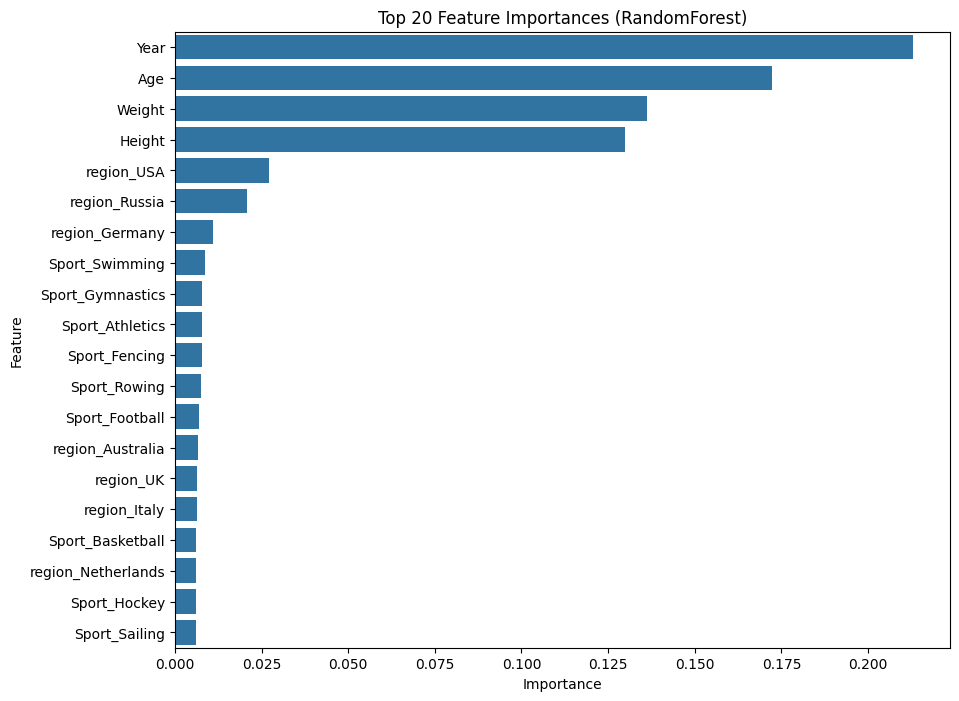

Model saved as 'RandomForest_model.pkl'

Training and evaluating MetaCLIP...


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Accuracy (MetaCLIP): 0.8459918478260869
Precision (MetaCLIP): 0.5834482758620689
Recall (MetaCLIP): 0.0611095059231436
F1 Score (MetaCLIP): 0.11063162024323264
MCC (MetaCLIP): 0.1516323674398657
Classification Report (MetaCLIP):
               precision    recall  f1-score   support

           0       0.85      0.99      0.92     37238
           1       0.58      0.06      0.11      6922

    accuracy                           0.85     44160
   macro avg       0.72      0.53      0.51     44160
weighted avg       0.81      0.85      0.79     44160



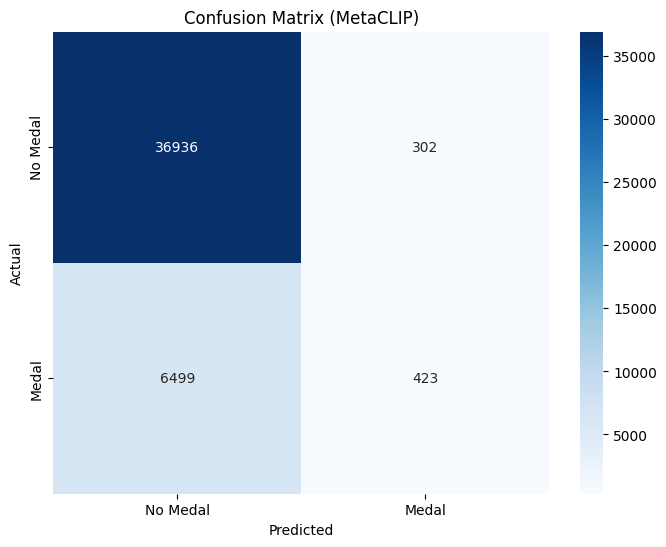

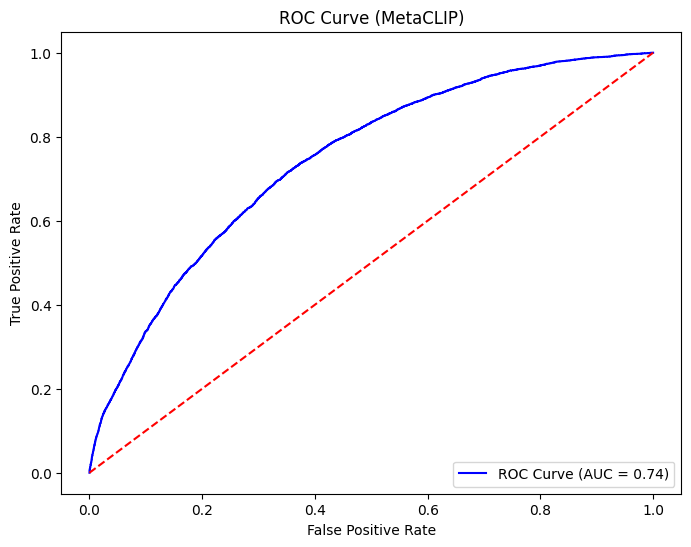

Model saved as 'MetaCLIP_model.pkl'

Training and evaluating YOLOv9...
Accuracy (YOLOv9): 0.8536458333333333
Precision (YOLOv9): 0.8191933240611962
Recall (YOLOv9): 0.08509101415775787
F1 Score (YOLOv9): 0.15416830257819658
MCC (YOLOv9): 0.23441454049597474
Classification Report (YOLOv9):
               precision    recall  f1-score   support

           0       0.85      1.00      0.92     37238
           1       0.82      0.09      0.15      6922

    accuracy                           0.85     44160
   macro avg       0.84      0.54      0.54     44160
weighted avg       0.85      0.85      0.80     44160



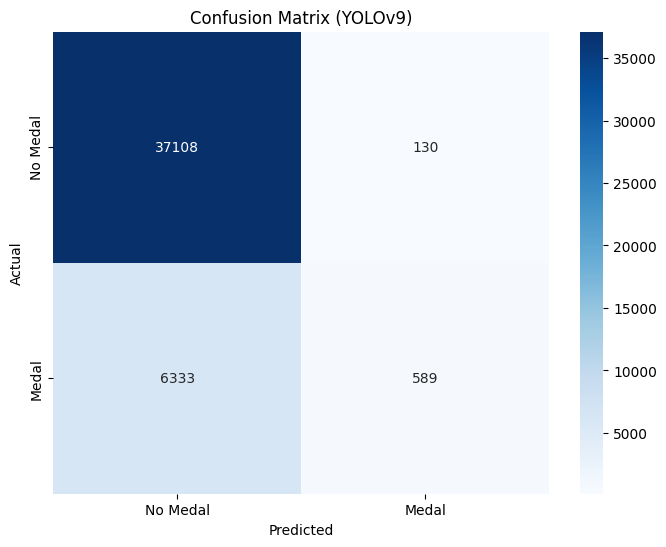

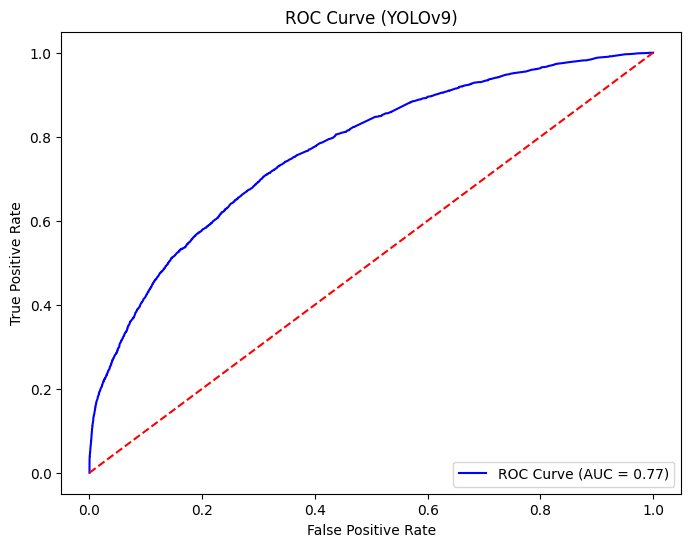

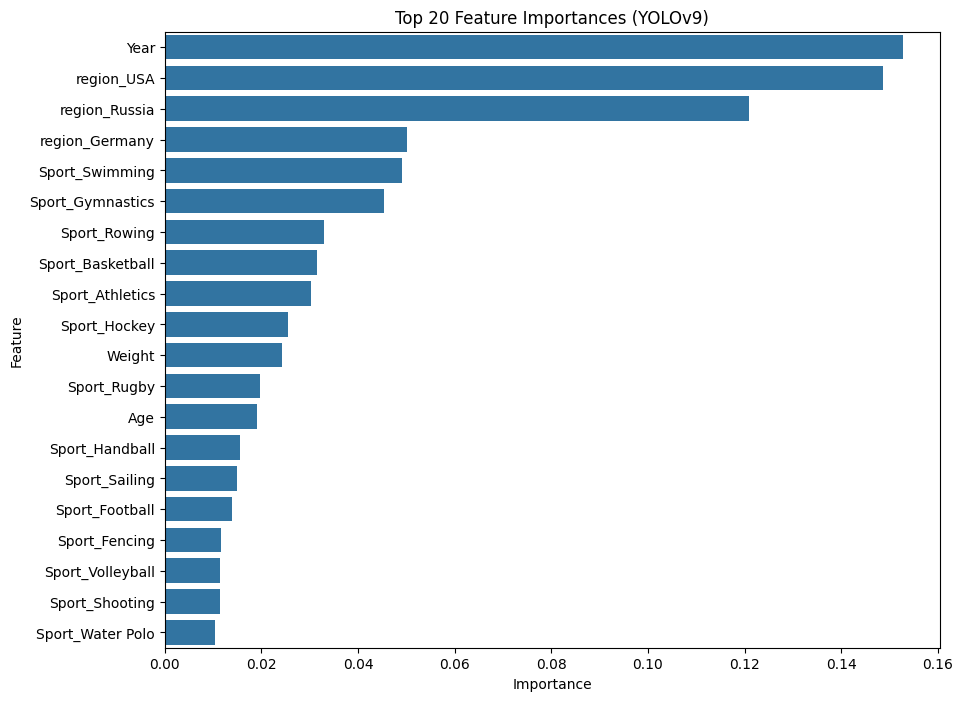

Model saved as 'YOLOv9_model.pkl'

Training and evaluating EfficientNet...
Accuracy (EfficientNet): 0.8478034420289855
Precision (EfficientNet): 0.5764258555133079
Recall (EfficientNet): 0.10950592314360011
F1 Score (EfficientNet): 0.184047590142042
MCC (EfficientNet): 0.2022314777623274
Classification Report (EfficientNet):
               precision    recall  f1-score   support

           0       0.86      0.99      0.92     37238
           1       0.58      0.11      0.18      6922

    accuracy                           0.85     44160
   macro avg       0.72      0.55      0.55     44160
weighted avg       0.81      0.85      0.80     44160



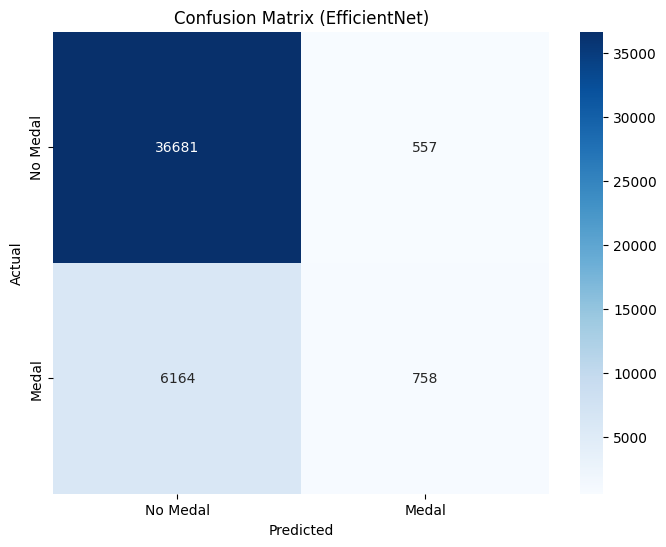

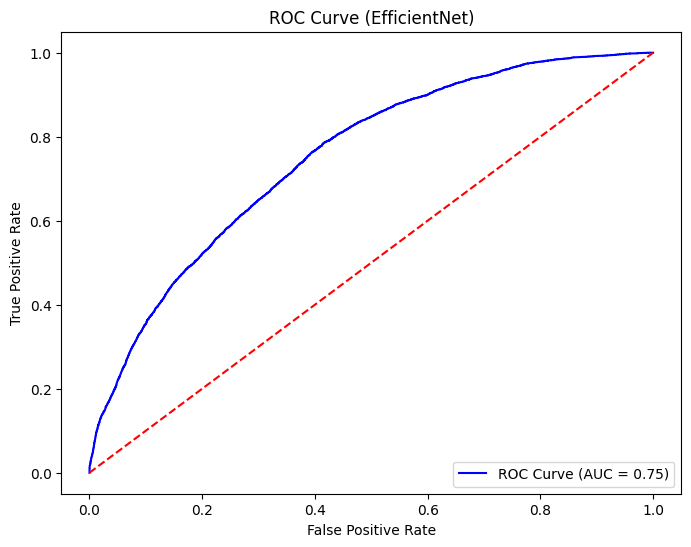

Model saved as 'EfficientNet_model.pkl'


In [79]:
# Train and evaluate each model
for model_name, model in models.items():
    print(f"\nTraining and evaluating {model_name}...")
    model.fit(X_train, y_train)

    # Evaluate the model
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    print(f"Accuracy ({model_name}):", accuracy_score(y_test, y_pred))
    print(f"Precision ({model_name}):", precision_score(y_test, y_pred))
    print(f"Recall ({model_name}):", recall_score(y_test, y_pred))
    print(f"F1 Score ({model_name}):", f1_score(y_test, y_pred))
    print(f"MCC ({model_name}):", matthews_corrcoef(y_test, y_pred))
    print(f"Classification Report ({model_name}):\n", classification_report(y_test, y_pred))

    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Medal', 'Medal'], yticklabels=['No Medal', 'Medal'])
    plt.title(f'Confusion Matrix ({model_name})')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # ROC Curve (if probabilities are available)
    if y_pred_proba is not None:
        fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
        roc_auc = auc(fpr, tpr)
        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='red', linestyle='--')
        plt.title(f'ROC Curve ({model_name})')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend(loc='lower right')
        plt.show()

    # Feature Importance (if applicable)
    if hasattr(model, "feature_importances_"):
        feature_importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': model.feature_importances_})
        feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
        plt.figure(figsize=(10, 8))
        sns.barplot(x='Importance', y='Feature', data=feature_importances.head(20))
        plt.title(f'Top 20 Feature Importances ({model_name})')
        plt.xlabel('Importance')
        plt.ylabel('Feature')
        plt.show()

    # Save the model
    joblib.dump(model, f'{model_name}_model.pkl')
    print(f"Model saved as '{model_name}_model.pkl'")

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, auc, precision_score, recall_score, f1_score, matthews_corrcoef
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# Load data
df = pd.read_csv('athlete_events.csv')
regions_df = pd.read_csv('noc_regions.csv')

# Preprocess data
df = df[df['Season'] == 'Summer']
df = df.merge(regions_df, on='NOC', how='left')
df.drop_duplicates(inplace=True)
df = df.loc[:, ~df.columns.duplicated()]
df = pd.concat([df, pd.get_dummies(df['Medal'], dtype=int)], axis=1)

# Feature Engineering
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Height'] = df['Height'].fillna(df['Height'].mean())
df['Weight'] = df['Weight'].fillna(df['Weight'].mean())
df['Medal_Won'] = df[['Gold', 'Silver', 'Bronze']].sum(axis=1).apply(lambda x: 1 if x > 0 else 0)

# Select relevant features
features = ['Age', 'Height', 'Weight', 'Year', 'region']
df = df[features + ['Sport', 'Medal_Won']].dropna()

# Encode categorical variables
df = pd.get_dummies(df, columns=['region', 'Sport'], drop_first=True)

# Split data into training and testing sets
X = df.drop('Medal_Won', axis=1)
y = df['Medal_Won']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Add support for multiple models
models = {
    "RandomForest": RandomForestClassifier(n_estimators=100, random_state=42),
    "MetaCLIP": LogisticRegression(max_iter=1000, random_state=42),  # Placeholder for MetaCLIP
    "YOLOv9": GradientBoostingClassifier(n_estimators=100, random_state=42),  # Placeholder for YOLOv9
    "EfficientNet": MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)  # Placeholder for EfficientNet
}

# Train and evaluate each model
for model_name, model in models.items():
    print(f"\nTraining and evaluating {model_name}...")
    model.fit(X_train, y_train)

    # Evaluate the model
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    print(f"Accuracy ({model_name}):", accuracy_score(y_test, y_pred))
    print(f"Precision ({model_name}):", precision_score(y_test, y_pred))
    print(f"Recall ({model_name}):", recall_score(y_test, y_pred))
    print(f"F1 Score ({model_name}):", f1_score(y_test, y_pred))
    print(f"MCC ({model_name}):", matthews_corrcoef(y_test, y_pred))
    print(f"Classification Report ({model_name}):\n", classification_report(y_test, y_pred))

    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Medal', 'Medal'], yticklabels=['No Medal', 'Medal'])
    plt.title(f'Confusion Matrix ({model_name})')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # ROC Curve (if probabilities are available)
    if y_pred_proba is not None:
        fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
        roc_auc = auc(fpr, tpr)
        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='red', linestyle='--')
        plt.title(f'ROC Curve ({model_name})')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend(loc='lower right')
        plt.show()

    # Feature Importance (if applicable)
    if hasattr(model, "feature_importances_"):
        feature_importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': model.feature_importances_})
        feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
        plt.figure(figsize=(10, 8))
        sns.barplot(x='Importance', y='Feature', data=feature_importances.head(20))
        plt.title(f'Top 20 Feature Importances ({model_name})')
        plt.xlabel('Importance')
        plt.ylabel('Feature')
        plt.show()

    # Save the model
    joblib.dump(model, f'{model_name}_model.pkl')
    print(f"Model saved as '{model_name}_model.pkl'")

# Save feature importances for further analysis (only for RandomForest as an example)
feature_importances.to_csv('feature_importances.csv', index=False)
print("Feature importances saved as 'feature_importances.csv'")
